# <center><span style="color:red;"> <b> Medical Cost Personal Datasets </b></span></center>

<p align="center">
    <strong> </strong> <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance"> Kaggle - Insurance Dataset Link</a>
</p>

## <center><span style="text-decoration: underline;">Exploratory Data Analysis (EDA)</span></center>

<h4 style="margin-bottom: 0;">📝 Dataset Description: Medical Cost Personal Datasets </h4>

- **`age`**: Age of the primary beneficiary.
- **`sex`**: Gender of the insurance contractor (*female* or *male*).
- **`bmi`**: Body Mass Index (BMI), providing an understanding of body weight relative to height.
  - BMI is calculated as weight (kg) / height (m²).
  - Ideally, BMI should be in the range of **18.5 to 24.9**.
- **`children`**: Number of children covered by health insurance (dependents).
- **`smoker`**: Indicates whether the individual smokes (*yes* or *no*).
- **`region`**: Residential area of the beneficiary in the United States:
  - Northeast
  - Southeast
  - Southwest
  - Northwest
- **`charges`**: Individual medical costs billed by health insurance.

Source: ["Medical Cost Personal Datasets" (kaggle.com)](https://www.kaggle.com/datasets/mirichoi0218/insurance/) 

<h4 style="margin-bottom: 0;"> ⚙️ Download Libraries </h4>

In [77]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from IPython.display import display
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
# Choose the template for your figures
sns.set_theme("notebook") 
sns.set_palette("Set3") 

<h4 style="margin-bottom: 0;"> 🔬 Prepare Functions for Statistical Analysis </h4>

In [78]:
# Set significance level
alpha = 0.05

# Function to print whether the data is normaly distributed
def normality_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0 - the data is not normally distributed.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0 - the data is normally distributed.'
        
# Function to print the output of tested hypothesis
def hypothesis_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0.'

<h4 style="margin-bottom: 0;"> ✨ Some preliminary descriptive analysis </h4>

In [79]:
# Upload Dataset
data = pd.read_csv('data/insurance.csv')
display('Beginning of the dataset:')
display(data.head(2))
display('End of the dataset:')
display(data.head(2))
display("Number of variables:", data.shape[1])
display('Number of observations:', data.shape[0])

'Beginning of the dataset:'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


'End of the dataset:'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


'Number of variables:'

7

'Number of observations:'

1338

<h4 style="margin-bottom: 0;"> 🧐 Feature Engineering </h4> 

In [80]:
data['smoker_enc'] = data['smoker'].apply(lambda x: 1 if x == "yes" else 0)
data['sex_enc'] = data['sex'].apply(lambda x: 1 if x == "male" else 0)

encoder = ce.OneHotEncoder(cols=['region'], use_cat_names=True) 
type_bin = encoder.fit_transform(data['region'])
data = pd.concat([data, type_bin], axis=1)
display(data.head(2))

,age,sex,bmi,children,smoker,region,charges,smoker_enc,sex_enc,region_southwest,region_southeast,region_northwest,region_northeast
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,1,0,0,0
1,18,male,33.77,1,no,southeast,1725.5523,0,1,0,1,0,0


In [81]:
data.describe().round(3)

,age,bmi,children,charges,smoker_enc,sex_enc,region_southwest,region_southeast,region_northwest,region_northeast
count,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422,0.205,0.505,0.243,0.272,0.243,0.242
std,14.050,6.098,1.205,12110.011,0.404,0.500,0.429,0.445,0.429,0.429
min,18.000,15.960,0.000,1121.874,0.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,26.296,0.000,4740.287,0.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,30.400,1.000,9382.033,0.000,1.000,0.000,0.000,0.000,0.000
75%,51.000,34.694,2.000,16639.913,0.000,1.000,0.000,1.000,0.000,0.000
max,64.000,53.130,5.000,63770.428,1.000,1.000,1.000,1.000,1.000,1.000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   charges           1338 non-null   float64
 7   smoker_enc        1338 non-null   int64  
 8   sex_enc           1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_northwest  1338 non-null   int64  
 12  region_northeast  1338 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 136.0+ KB


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- There are 1338 non-missing observations. </p>
<p>

---

In [83]:
print(f'Number of duplicates: {data[data.duplicated()].shape[0]}')

# Drop duplicates:
data = data.drop_duplicates()
print('Dimension of the dataframe after the drop of duplicates: {}'.format(data.shape))

Number of duplicates: 1
Dimension of the dataframe after the drop of duplicates: (1337, 13)


In [84]:
def combined_heatmap_corr(data, list_columns, title=None):
    # Calculate the Pearson and Spearman correlation matrices
    correlation_pearson = data[list_columns].corr(numeric_only=True, method='pearson')
    correlation_spearman = data[list_columns].corr(numeric_only=True, method='spearman')

    # Create a mask for the upper triangle (for Pearson)
    mask_upper = np.triu(np.ones_like(correlation_pearson, dtype=bool))
    
    # Create a mask for the lower triangle (for Spearman)
    mask_lower = np.tril(np.ones_like(correlation_spearman , dtype=bool))

    # Plotting the heatmap
    plt.figure(figsize=(13, 5))
    

    # Plot the Pearson correlation in the upper triangle
    sns.heatmap(
        correlation_pearson,
        mask=mask_upper,  # Mask lower triangle for Pearson
        vmin=-1, # sets the minimum data value that corresponds to the lowest color in the colormap
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True
    )

    # Plot the Spearman correlation in the lower triangle
    sns.heatmap(
        correlation_spearman,
        mask=mask_lower,  # Mask upper triangle for Spearman
        vmin=-1,
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True,
        cbar=False  # Disable color bar for second plot to avoid overlap
    )

    # Fill the diagonal with 1s
    for i in range(len(correlation_pearson)):
        plt.text(i + 0.5, i + 0.5, '1.00', ha='center', va='center', color='black', fontsize=10) # `ha`(`va`) text will be centered horizontally (vertically) at the specified x (y) - coordinate

    plt.title(title, fontsize=13, pad = 10) # pad defines the distance between the title and the graph
    plt.text(0.0, -0.40, '* Pearson (Spearman) bottom (upper) left (right) corner', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=7) 
    plt.show()

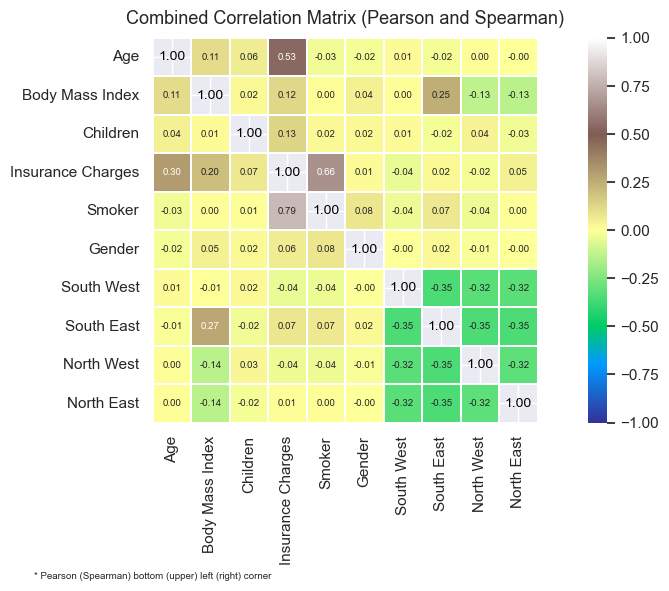

In [85]:
data_temp = data.rename(columns={
        'age': 'Age',
        'bmi': 'Body Mass Index',
        'charges': 'Insurance Charges',
        'children': 'Children',
        'smoker_enc': 'Smoker',
        'sex_enc': 'Gender',
        'region_southwest': 'South West',
        'region_southeast': 'South East',
        'region_northwest': 'North West',
        'region_northeast': 'North East'
        })
combined_heatmap_corr(
    data=data_temp,
    list_columns = list(data_temp.select_dtypes(include=['number']).columns),
    title='Combined Correlation Matrix (Pearson and Spearman)'
)


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4> 
<p>
- <i> The table above presents the correlation matrix, showing Pearson correlations (bottom left) and Spearman correlations (upper right). </i>
</p>
<p>
- The Pearson correlation indicates that insurance charges have a strong correlation with smoking status (those who smoke pay more, with a correlation of 0.79). However, this correlation decreases to 0.66 when using the Spearman correlation. It is important to check for normality and linearity of the relationship before determining which correlation type to use.
</p>
<p>
- Additionally, there is a moderate correlation between age and insurance charges (0.30 for Pearson; 0.53 for Spearman).
</p>
<p>
- All other factors show weak correlations with insurance charges.
</p>

---

<h4 style="margin-bottom: 0;"> 📈 Graphical Analysis + Statistical Analysis </h4>

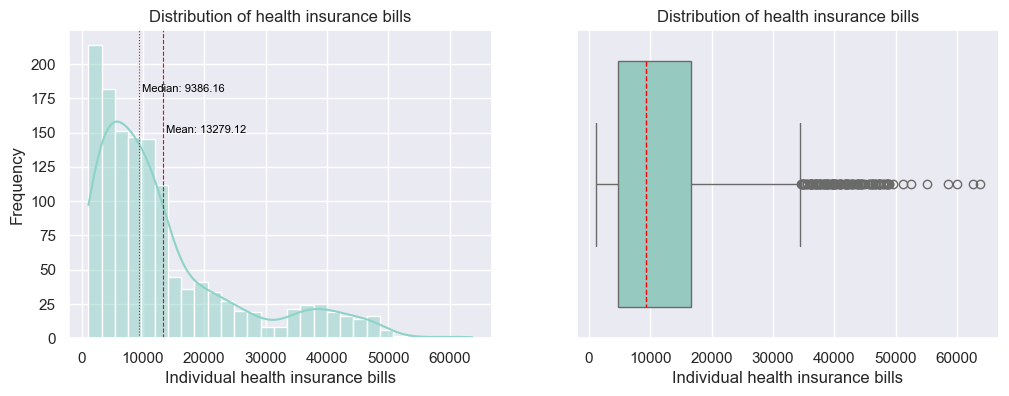

In [86]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(data['charges'], kde=True, ax=axes[0])
axes[0].set(xlabel='Individual health insurance bills', ylabel='Frequency')
axes[0].set_title('Distribution of health insurance bills')
axes[0].axvline(data['charges'].mean(), color='red', linestyle='--', linewidth=0.8)
mean_value = data['charges'].mean()  # Calculate the mean
axes[0].annotate(f'Mean: {mean_value:.2f}', 
                 xy=(data['charges'].mean(), 0),
                 xytext=(data['charges'].mean() + 500, 150),
                 fontsize=8, color='black')
axes[0].axvline(data['charges'].median(), color='red', linestyle=':', linewidth=0.8)
median_value = data['charges'].median()  # Calculate the median
axes[0].annotate(f'Median: {median_value:.2f}',
                 xy=(data['charges'].median(), 0),
                 xytext=(data['charges'].median() + 500, 180),
                 fontsize=8, color='black')

sns.boxplot(data['charges'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Individual health insurance bills')
axes[1].set_title('Distribution of health insurance bills')

plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- Individual health insurance bills are right-skewed, with a median value of 9,386.16 and a mean value of 13,279.12 (The data is not normally distributed). </p>
<p>
- The boxplot indicates the presence of some outliers.
</p>
- Let's see some descriptive statistics:

---

In [87]:
data_charge = data['charges'].describe().round(2).to_frame()
data_charge.columns = ['Insurance charges']
display(data_charge)

,Insurance charges
count,1337.00
mean,13279.12
std,12110.36
min,1121.87
25%,4746.34
50%,9386.16
75%,16657.72
max,63770.43


<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on an individuals' gender </h4>

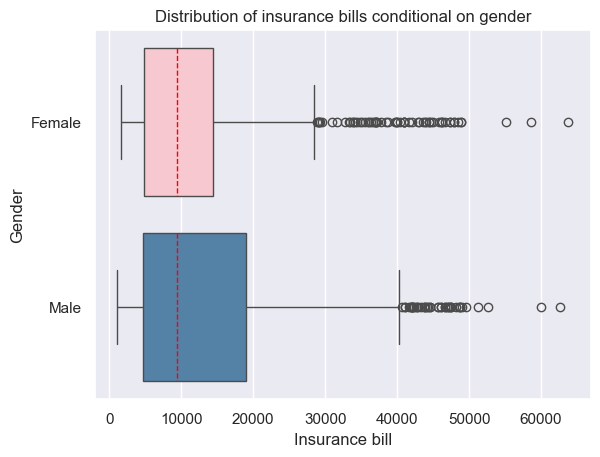

In [88]:
ax = sns.boxplot(data, x = 'charges', y='sex', orient='h', 
                 hue = 'sex', palette={'male': 'steelblue', 'female': 'pink'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_yticklabels(['Female', 'Male'])
ax.set_title('Distribution of insurance bills conditional on gender')
ax.set(xlabel = 'Insurance bill', ylabel = 'Gender')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- <strong>Graphical Analysis:</strong> Based on the visual representation, we cannot definitively conclude whether there is a significant difference in insurance bills (median) between males and females. </p>
<p>
- <strong>Notable Observations:</strong> Males exhibit a higher interquartile range (IQR) of insurance bills and a higher fourth quartile. These observations may provide an initial expectation of a potential statistically significant difference between male and female insurance bills.
</p>
- Let's examine some further descriptive statistics:

---

In [89]:
data_group_sex = data.groupby('sex')['charges'].describe().round(2)
display(data_group_sex)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.58,11128.70,1607.51,4885.16,9412.96,14454.69,63770.43
male,675.0,13975.00,12971.96,1121.87,4654.02,9377.90,19006.69,62592.87


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The average value of males' insurance bills is higher than that of females. Additionally, both distributions are right-skewed.  </p>
<p>
- <strong>Important:</strong> The maximum value of female insurance bills is higher than that of males, potentially indicating the presence of more significant outliers in the female group.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between males ($μ_1$) and females ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [90]:
# Test whether the data is normally distributed. 
male_bill = data.loc[data['sex'] == 'male', 'charges']
female_bill = data.loc[data['sex'] == 'female', 'charges']

print('Normality test for males:')
_, pval_norm = stats.shapiro(male_bill)
print(normality_test(pval_norm))

print('Normality test for females:')
_, pval_norm = stats.shapiro(female_bill)
print(normality_test(pval_norm))

Normality test for males:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for females:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test  </p>

---

In [91]:
_, pval = stats.mannwhitneyu(male_bill, female_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.35) is greater than the specified significance level 0.05. We fail to reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- There is <b><u>no</u></b> basis to claim that the amount of insurance bills for male clients is higher than for female clients.  
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on whether an individuals is smoking or not </h4>

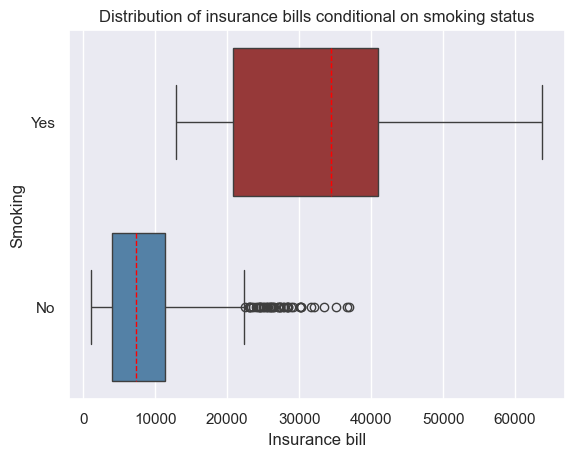

In [92]:
ax = sns.boxplot(data, x = 'charges', y='smoker', orient='h', 
                 hue = 'smoker', palette={'yes': 'brown', 'no': 'steelblue'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1]) 
ax.set_yticklabels(['Yes', 'No'])
ax.set_title('Distribution of insurance bills conditional on smoking status')
ax.set(xlabel = 'Insurance bill', ylabel = 'Smoking')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- Graphical representation clearly indicates that smokers have higher median value of health insurance bills compared to non-smokers. Additionally, there are no outliers in case of smokers.  </p>
<p>
- In case of non-smokers, we can observe that there are some outliers in the data. 
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [93]:
data_group_smoker = data.groupby('smoker')['charges'].describe().round(2)
display(data_group_smoker)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.66,5992.97,1121.87,3988.88,7345.73,11363.02,36910.61
yes,274.0,32050.23,11541.55,12829.46,20826.24,34456.35,41019.21,63770.43


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The average value of smokers' insurance bills is approximately four times higher than that of non-smokers. 
</p>
<p>
- The distribution of insurance bills for non-smokers is right-skewed, whereas for smokers, it is left-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations attributable to smokers is four times lower than that of non-smokers.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between smokers ($μ_1$) and fnonsmokers ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [94]:
# Test whether the data is normally distributed. 
smoker_bill = data.loc[data['smoker'] == 'yes', 'charges']
nonsmoker_bill = data.loc[data['smoker'] == 'no', 'charges']

print('Normality test for smokers:')
_, pval_norm = stats.shapiro(smoker_bill)
print(normality_test(pval_norm))

print('Normality test for nonsmokers:')
_, pval_norm = stats.shapiro(nonsmoker_bill)
print(normality_test(pval_norm))

Normality test for smokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for nonsmokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test  </p>

---

In [95]:
_, pval = stats.mannwhitneyu(smoker_bill, nonsmoker_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The amount of insurance bills for nonsmokers is statistically significant and lower compared to those who smoke.  
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on the region </h4>

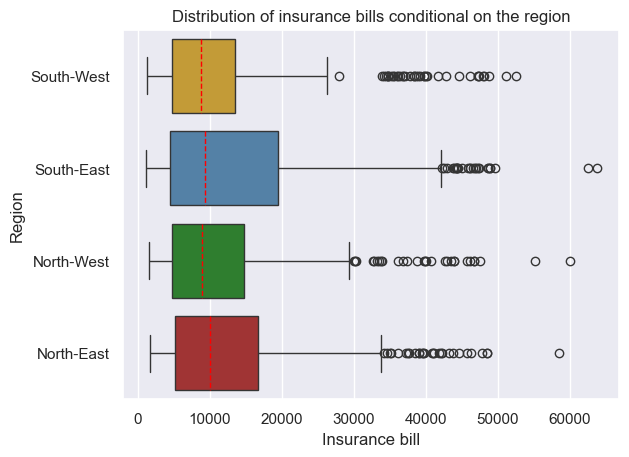

In [96]:
ax = sns.boxplot(data, x = 'charges', y='region', orient='h', 
                 hue = 'region', palette={'southwest': 'goldenrod', 'southeast': 'steelblue', 'northwest': 'forestgreen', 'northeast': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3]) 
ax.set_yticklabels(['South-West', 'South-East', 'North-West', 'North-East'])
ax.set_title('Distribution of insurance bills conditional on the region')
ax.set(xlabel = 'Insurance bill', ylabel = 'Region')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation does not reveal any significant differences in insurance bills across regions, except for some minor variations.
</p>
<p>
- Of note, the South-East region has the highest interquartile range (IQR), while the South-West region has the lowest.
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [97]:
data_group_region = data.groupby('region')['charges'].describe().round(2)
display(data_group_region)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.38,11255.80,1694.80,5194.32,10057.65,16687.36,58571.07
northwest,324.0,12450.84,11073.13,1621.34,4733.64,8976.98,14788.75,60021.40
southeast,364.0,14735.41,13971.10,1121.87,4440.89,9294.13,19526.29,63770.43
southwest,325.0,12346.94,11557.18,1241.56,4751.07,8798.59,13462.52,52590.83


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- There is no significant difference in the mean values of insurance bills across regions. The highest mean value is observed in the South-East region, while the lowest is in the North-West.
</p>
<p>
- The distributions of insurance bills across regions are right-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations within the regions is approximately equal.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different regions: Northeast ($μ_1$), Southeast ($μ_2$), Southwest ($μ_3$), Northwest ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [98]:
northeast_bill = data.loc[data['region']=='northeast', 'charges']
northwest_bill = data.loc[data['region']=='northwest', 'charges']
southeast_bill = data.loc[data['region']=='southeast', 'charges']
southwest_bill = data.loc[data['region']=='southwest', 'charges']

# Tests of normality
print('Normality - North East region:')
_, pval = stats.shapiro(northeast_bill)
print(normality_test(pval))

print('Normality - North West region:')
_, pval = stats.shapiro(northwest_bill)
print(normality_test(pval))

print('Normality - South East region:')
_, pval = stats.shapiro(southeast_bill)
print(normality_test(pval))

print('Normality - South West region:')
_, pval = stats.shapiro(southwest_bill)
print(normality_test(pval))

Normality - North East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - North West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test  </p>

---

In [99]:
_, pval = stats.kruskal(northeast_bill, northwest_bill, southeast_bill, southwest_bill)
print(hypothesis_test(pval))

The p-value (0.20) is greater than the specified significance level 0.05. We fail to reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We fail to reject H0: There are no statistically significant differences in insurance bills across regions.
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on age group </h4>

In [100]:
# Generate new variable that splits the age into subgroups
"""
    18–27: Young Adults (below 25th percentile)
    28–39: Early Middle Age (25th to 50th percentile)
    40–51: Late Middle Age (50th to 75th percentile)
    52–64: Seniors (above 75th percentile)
"""
# right = False - ensures that the intervals are as follows [a, b)    
data['AgeBins'] = pd.cut(data['age'], 
                         bins=[18, 28, 40, 52, 65], 
                         labels=['YoungAdult', 'EarlyMiddleAge', 'LateMiddleAge', 'Seniors'], 
                         right = False)    

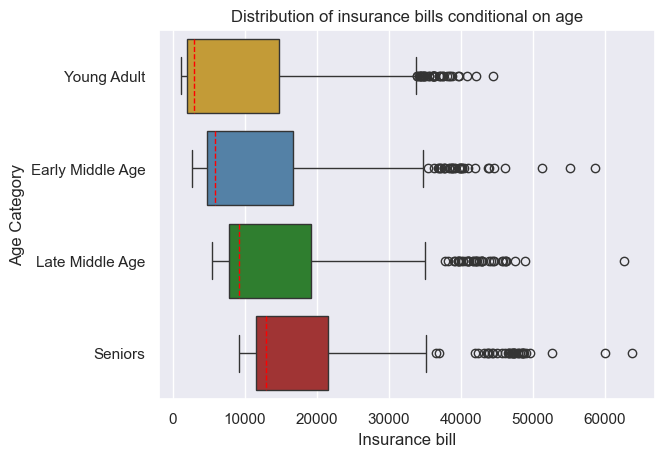

In [101]:
ax = sns.boxplot(data, x = 'charges', y='AgeBins', orient='h', 
                 hue = 'AgeBins', palette={'YoungAdult': 'goldenrod', 'EarlyMiddleAge': 'steelblue', 'LateMiddleAge': 'forestgreen', 'Seniors': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set_title('Distribution of insurance bills conditional on age')
ax.set(xlabel = 'Insurance bill', ylabel = 'Age Category')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates a clear trend of increasing health insurance bills with age
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [102]:
data_group_age = data.groupby('AgeBins', observed=False)['charges'].describe().round(2)
display(data_group_age)

,count,mean,std,min,25%,50%,75%,max
AgeBins,,,,,,,,
YoungAdult,361.0,9118.85,11558.22,1121.87,1986.93,2897.32,14711.74,44501.40
EarlyMiddleAge,312.0,11385.96,11659.54,2689.50,4662.40,5796.97,16687.36,58571.07
LateMiddleAge,337.0,14618.37,11651.65,5415.66,7740.34,9095.07,19144.58,62592.87
Seniors,327.0,18298.07,11583.67,9140.95,11523.64,12979.36,21496.41,63770.43


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- With age, the mean value of health-related insurance bills increases.
</p>
<p>
- The distributions of insurance bills across age groups are right-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations within the age group is approximately equal.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different age groups: Young Adult ($μ_1$), Early Middle Age ($μ_2$), Late Middle Age ($μ_3$), Seniors ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [103]:
young_bill = data.loc[data['AgeBins']=='YoungAdult', 'charges']
earlymiddle_bill = data.loc[data['AgeBins']=='EarlyMiddleAge', 'charges']
latemiddle_bill = data.loc[data['AgeBins']=='LateMiddleAge', 'charges']
senior_bill = data.loc[data['AgeBins']=='Seniors', 'charges']

# Tests of normality
print('Normality - Young Adults:')
_, pval = stats.shapiro(young_bill)
print(normality_test(pval))

print('Normality - Early Middle Age:')
_, pval = stats.shapiro(earlymiddle_bill)
print(normality_test(pval))

print('Normality - Late Middle Age:')
_, pval = stats.shapiro(latemiddle_bill)
print(normality_test(pval))

print('Normality - Seniors:')
_, pval = stats.shapiro(senior_bill)
print(normality_test(pval))

Normality - Young Adults:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Early Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Late Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Seniors:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test  </p>

---

In [104]:
_, pval = stats.kruskal(young_bill, earlymiddle_bill, latemiddle_bill, senior_bill)
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in insurance bills across age groups!
</p>

---

<h4 style="margin-bottom: 0; color: red; font-weight: bold;">📌 Extra Analysis</h4>

- In this section, I test additional hypotheses:
    - Do we observe a statistically significant difference in smoking behavior within:  
        a. Gender groups  
        b. Age subgroups

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on age group </h4>

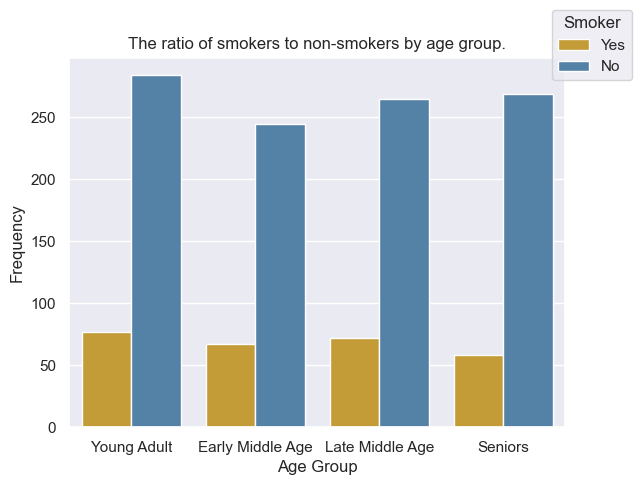

In [105]:
ax = sns.countplot(data=data, x=data['AgeBins'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1, 2, 3])  
ax.set_xticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set(xlabel='Age Group', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by age group.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates no clear difference in smoking behavior across age groups
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

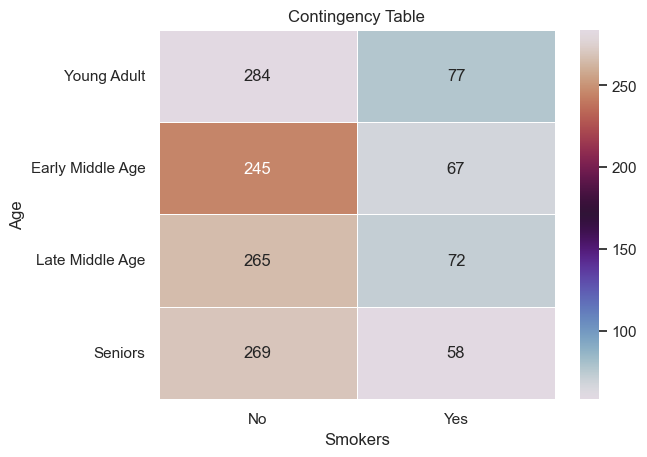

In [106]:
cross_tab = pd.crosstab(index=data['AgeBins'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Age')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5, 2.5, 3.5])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
plt.title('Contingency Table')
plt.show()

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different age groups
**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [107]:
crosstab_tab = pd.crosstab(data['AgeBins'], data['smoker'])
display(crosstab_tab)

smoker,no,yes
AgeBins,,
YoungAdult,284,77
EarlyMiddleAge,245,67
LateMiddleAge,265,72
Seniors,269,58


In [108]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)


'The p-value (0.57) is greater than the specified significance level 0.05. We fail to reject H0.'

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across age groups!
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on gender </h4>

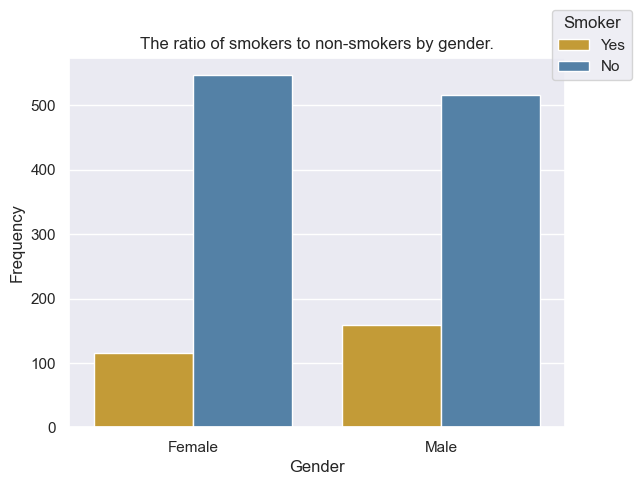

In [109]:
ax = sns.countplot(data=data, x=data['sex'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_xticklabels(['Female', 'Male'])
ax.set(xlabel='Gender', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by gender.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We can see that there are more males who smoke compared to females. Additionally, it can be inferred that the ratio of smoking males to non-smoking males is higher than the ratio of smoking females to non-smoking females.
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

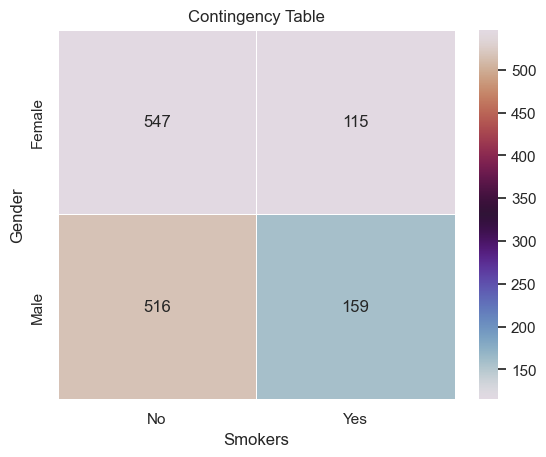

In [110]:
cross_tab = pd.crosstab(index=data['sex'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidths=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Gender')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5])  
ax.set_yticklabels(['Female', 'Male'])
plt.title('Contingency Table')
plt.show()



<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different gender groups
**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [111]:
crosstab_tab = pd.crosstab(data['sex'], data['smoker'])
display(crosstab_tab)

smoker,no,yes
sex,,
female,547,115
male,516,159


In [112]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)

'The p-value (0.01) is less than the specified significance level 0.05. We reject H0.'

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across gender groups!
</p>

---
---

## <center><span style="color:red;"> <b> 🚨 Conclusions of EDA </b></span><center>

* There is no evidence to suggest that there is a difference in the amount of insurance bills paid by male vs female clients.
* The amount of insurance bills for non-smoking clients is lower than for smoking clients.
* There is no evidence to suggest that there is a difference in the amount of insurance bills across different regions.
* There is evidence to suggest that there is a difference in the amount of insurance bills across different age groups.

* **Extra Analysis:**
    * There is an association between age group and smoking status.
    * There is an association between gender and smoking status.